To analyse churn and non-churn in telecom company (vodafone)-

# Context : 

 To ascertain the causes of customers switching to different telecom companies.                    

In [1]:
# importing the libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset using pandas-

vodafone = pd.read_csv('telecom_churn_data.csv',header = None)

In [3]:
# getting the first first rows of the dataset

vodafone.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# giving columns  a label to under what the column values represent-

vodafone = vodafone.rename (columns={ 0: 'State',
1: 'Account_Length',
2:'Area_Code', 
3:'Phone', 
4:'International_Plan', 
5 :'VMail_Plan', 
6 :'VMail_Message', 
7: 'Day_Mins', 
8 :'Day_Calls', 
9 :'Day_Charge', 
10 :'Eve_Mins', 
11 :'Eve_Calls', 
12 :'Eve_Charge', 
13 :'Night_Mins', 
14 :'Night_Calls', 
15 :'Night_Charge', 
16 :'International_Mins', 
17 :'International_calls', 
18 :'International_Charge', 
19 :'CustServ_Calls', 
20  :'Churn'})

In [5]:
# top 5 rows of dataset-

vodafone.head()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
# to get an idea of no of rows and columns-

vodafone.shape

(4617, 21)

Inference-

The dataset hass 4617 rows and 21 columns.

In [7]:
vodafone.drop('Phone',axis=1,inplace=True)

Inference

we are dropping phone numbers because it has its own individual values which are nothing but identities.

In [8]:
vodafone['Churn'] = vodafone['Churn'].str.strip()
vodafone['Churn'] = vodafone['Churn'].replace('\W','',regex=True)

 Inference
  
  we are removing whitespace  and removing the special characters from churn column.

In [9]:
# Information regarding dataset-

vodafone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account_Length        4617 non-null   int64  
 2   Area_Code             4617 non-null   int64  
 3   International_Plan    4617 non-null   object 
 4   VMail_Plan            4617 non-null   object 
 5   VMail_Message         4617 non-null   int64  
 6   Day_Mins              4617 non-null   float64
 7   Day_Calls             4617 non-null   int64  
 8   Day_Charge            4617 non-null   float64
 9   Eve_Mins              4617 non-null   float64
 10  Eve_Calls             4617 non-null   int64  
 11  Eve_Charge            4617 non-null   float64
 12  Night_Mins            4617 non-null   float64
 13  Night_Calls           4617 non-null   int64  
 14  Night_Charge          4617 non-null   float64
 15  International_Mins   

Inference-

The dataset has datatype: 

8 columns of float type

8 columns integer type

4 columns object type.

The entries-4617

In [10]:
# to check for null values in any columns-

vodafone.isna().sum()

State                   0
Account_Length          0
Area_Code               0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

Inference-

There are no null values present in the dataset.

In [11]:
#to get to know if there are  duplicate values in the dataset-

vodafone.duplicated().sum()

0

Inference-

THere are no duplicate values present in dataset.

In [12]:
# describing numerical column-

vodafone.describe()

,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Inference

Account_Length, Area_Code, VMail_Message, Day_Mins, Day_Calls, Day_Charge, Eve_Mins, Eve_Calls, Eve_Charge, Night_Mins, 

Night_Calls, Night_Charge, International_Mins, International_calls, International_Charge, CustServ_Calls are the numerical columns 

described above along with their mean,min and max.

In [13]:
# adding all minutes columns to create a new column named total mins-

vodafone['Total_Mins'] = vodafone['Day_Mins']+vodafone['Eve_Mins']+vodafone['Night_Mins']+vodafone['International_Mins']

In [14]:
# adding all charges columns to create a new column named total charges-

vodafone['Total_Charge'] = vodafone['Day_Charge']+vodafone['Eve_Charge']+vodafone['Night_Charge']+vodafone['International_Charge']

# Exploratory Data Analysis :

 Demographic data is the main point of interest i.e the are the target variable.The reason is that these variables have affect on why our customers are churning out of our serices.

### Analyzing the target variables -
 
Demographic data-

the columns to be included in it- 

Accountlength,International_Plan,International_Mins,International_Charge,VMail_Plan,VMail_Message,Day_Mins,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,CustServ_Calls.

In [15]:
# to know how many number of unique values each columns hold-

vodafone.nunique()

State                     51
Account_Length           218
Area_Code                  3
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
Total_Mins              3233
Total_Charge            3454
dtype: int64

In [16]:
# the distinct values in state column-

vodafone['State'].value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: State, dtype: int64

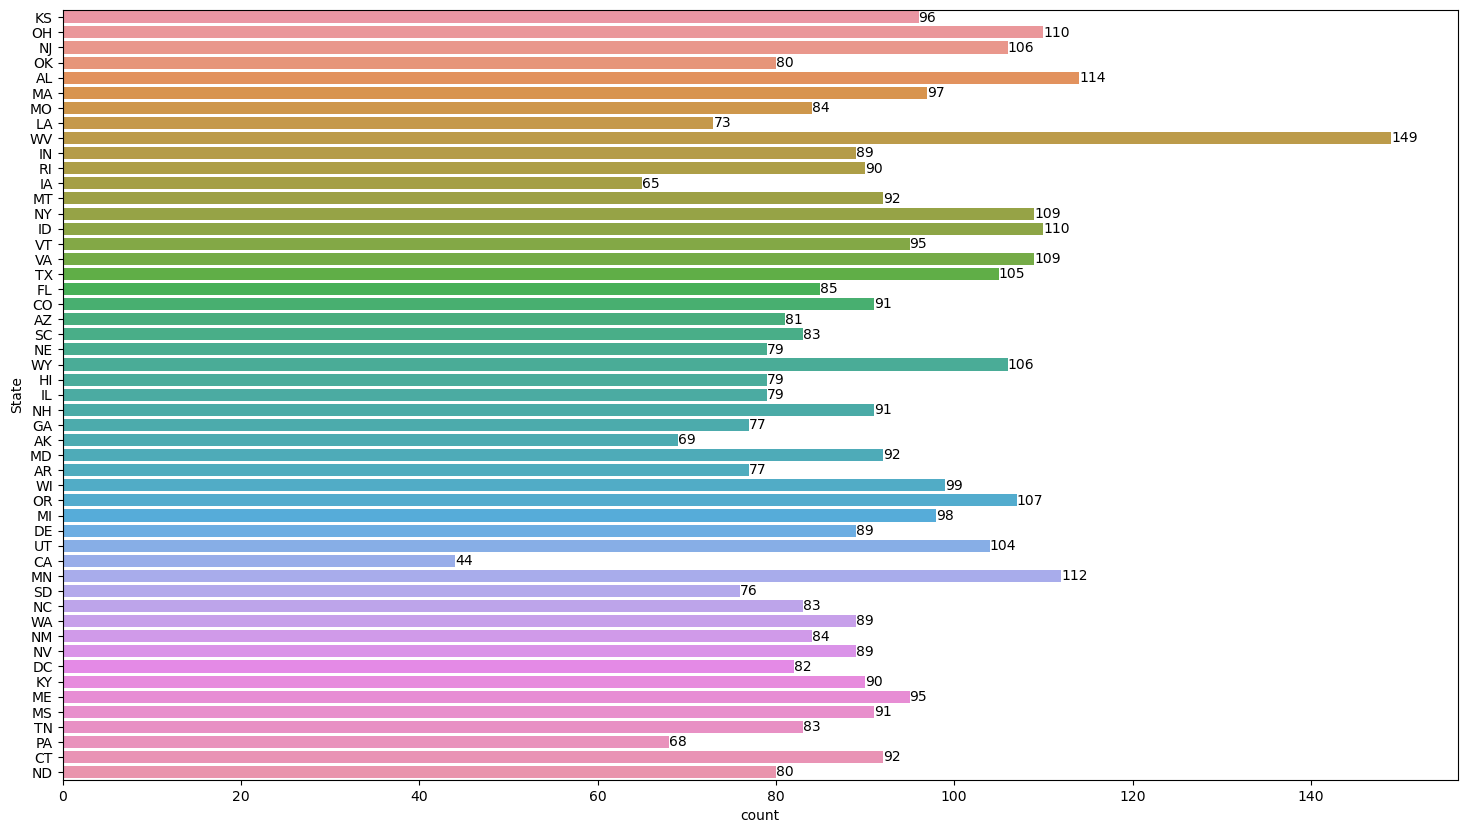

In [17]:
#plotting the state column to analyse the values distribution in it-

plt.figure (figsize=(18,10))
ax = sns.countplot(y = 'State', data = vodafone)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that all states has an average of 100 people as vodafone customers.

In [18]:
# the distinct values in account length column-

vodafone['Account_Length'].value_counts()

90     63
87     56
105    54
93     54
112    53
       ..
200     1
2       1
215     1
199     1
233     1
Name: Account_Length, Length: 218, dtype: int64

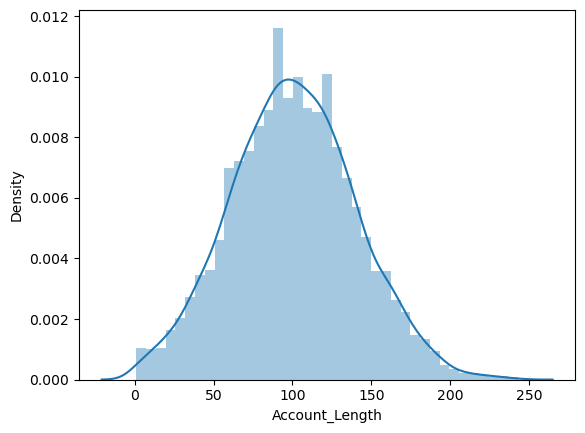

In [19]:
# plotting the graph-

sns.distplot(vodafone['Account_Length'])
plt.show()

Infernece

we can see that most of the months which have highest distribution are form 30 to 180 months.


This values need to be binned, so we can get a clear picture of the data.

In [20]:
vodafone['Time_Spent'] = pd.cut(vodafone['Account_Length'],bins = [0,30,60,90,120,150,180,210,245], labels = ['0-30','30-60','60-90','90-120','120-150','150-180','180-210','210-245'])

In [21]:
# the distinct values in time spent column-

vodafone['Time_Spent'].value_counts()

90-120     1342
60-90      1147
120-150     923
30-60       548
150-180     371
0-30        174
180-210      95
210-245      17
Name: Time_Spent, dtype: int64

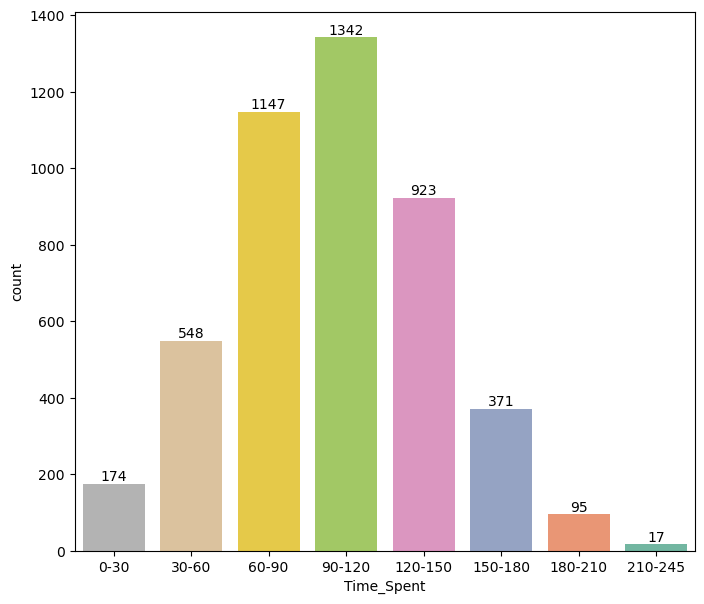

In [22]:
#plotting the time spent column to analyse the values distribution in it-

plt.figure (figsize=(8,7))

ax = sns.countplot(vodafone['Time_Spent'],palette='Set2_r')
ax.bar_label(ax.containers[0])
plt.show()

Inference-

Customer loyalty mostly comes from customers who were with us for a long time , as we can see after 120 the number keeps declining. it indicated that new customers tend to exit rather than old customers.

In [23]:
# the distinct values in area code column-

vodafone['Area_Code'].value_counts()

415    2299
408    1161
510    1157
Name: Area_Code, dtype: int64

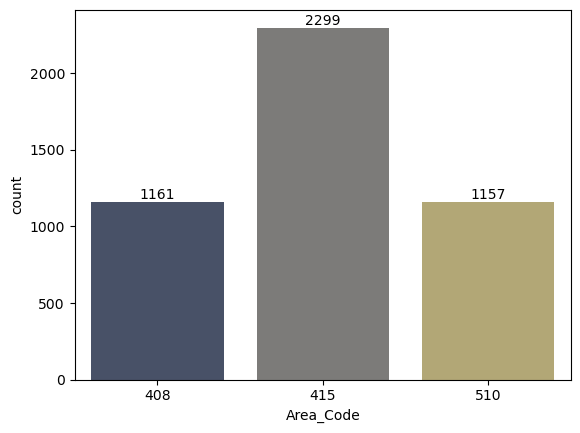

In [24]:
#plotting the Area code column to analyse the values distribution in it-

ax = sns.countplot(x = 'Area_Code', data = vodafone,palette='cividis')
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that a majority of our customers are form area code 415 followed by 408 and 510.

In [25]:
# the distinct values in international plan column-

vodafone['International_Plan'].value_counts()

 no     4171
 yes     446
Name: International_Plan, dtype: int64

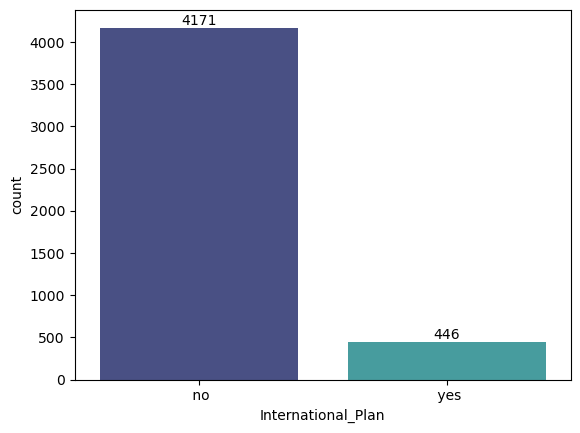

In [26]:
#plotting the international plan column to analyse the values distribution in it-

ax = sns.countplot(x = 'International_Plan', data = vodafone,palette = 'mako')
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that majority of our customers didn't avail for interantional plan.people tend to have local plan to reduce expenses.

In [27]:
# the distinct values in vmail plan column-

vodafone['VMail_Plan'].value_counts()

 no     3381
 yes    1236
Name: VMail_Plan, dtype: int64

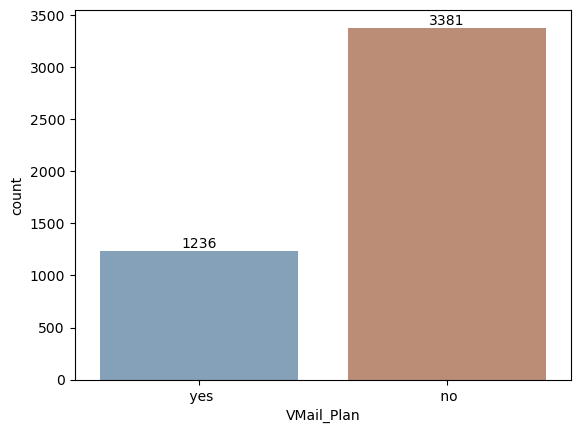

In [28]:
#plotting the vmail plan column to analyse the values distribution in it-

ax = sns.countplot(x = 'VMail_Plan', data = vodafone,palette ='twilight_shifted' )
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that majority of the customers didn't avail a vmail plan. customers avail voice mail because they are busy and when they couldn't attend a call it would direclty go to voice mail which will be reminded to them later.it seems like people dint't avail vmail plan because ,they are not looking the increase their expenses and they can amanage their calls with voice mail.

In [29]:
# the distinct values in vamil message column-

vodafone['VMail_Message'].value_counts()

0     3381
31      80
29      64
28      62
33      61
24      57
27      57
26      55
30      54
32      52
25      49
23      48
22      45
36      45
37      42
39      40
35      40
21      40
34      39
38      37
20      30
19      26
40      26
41      21
42      19
17      18
16      16
18      14
43      13
15      12
12      10
45      10
14       9
46       8
44       7
10       4
47       4
13       4
48       3
49       3
9        2
50       2
6        2
8        2
11       2
4        1
51       1
Name: VMail_Message, dtype: int64

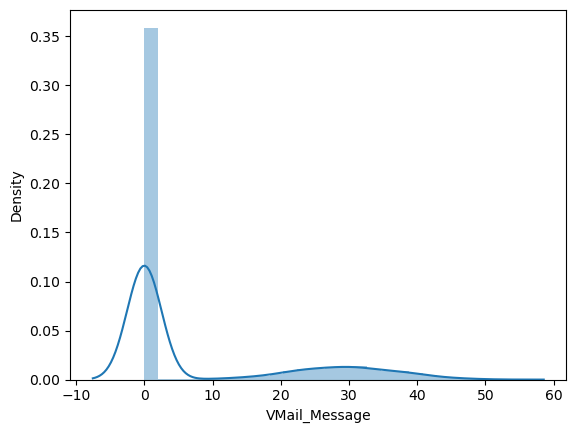

In [30]:
#plotting the vmail message column to analyse the values distribution in it-

sns.distplot(vodafone['VMail_Message'])
plt.show()

Inference-

This values need to be binned, so we can get a clear picture of the data.

In [31]:
vodafone['message'] = pd.cut(vodafone['VMail_Message'],bins= [-1,10,20,30,40,50,60],labels = ['0-10','10-20','20-30','30-40','40-50','50-60'])

In [32]:
# the distinct values in message column-

vodafone['message'].value_counts()

0-10     3392
20-30     531
30-40     462
10-20     141
40-50      90
50-60       1
Name: message, dtype: int64

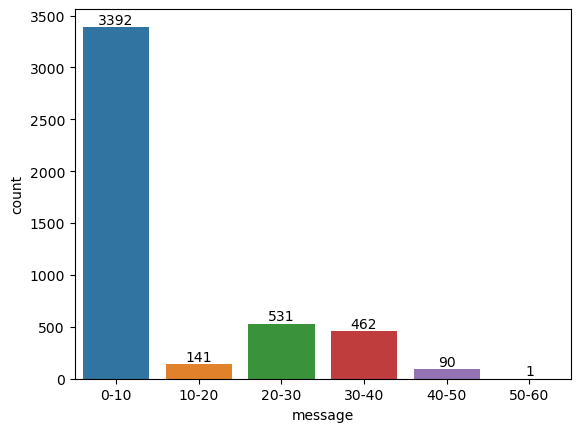

In [33]:
#plotting the message column to analyse the values distribution in it-

ax = sns.countplot(vodafone['message'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that majority of the customers use less than 10 message through our services, this is because customers tend to talk rather than message.people believe conveying message by call is better than texting message.

In [34]:
# the distinct values in customer service column-

vodafone['CustServ_Calls'].value_counts()

1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: CustServ_Calls, dtype: int64

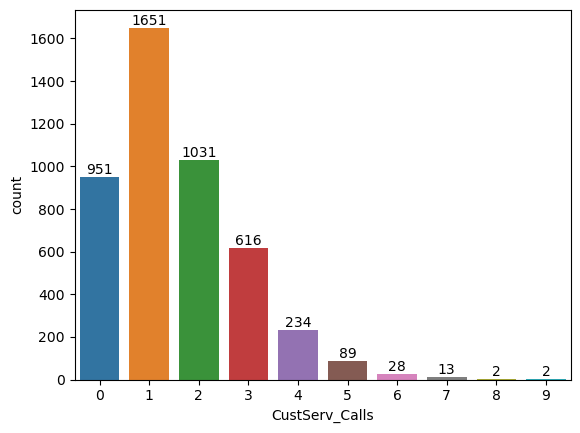

In [35]:
#plotting the customer service column to analyse the values distribution in it-

ax = sns.countplot(x = 'CustServ_Calls', data = vodafone)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we need to focus on people who use more customer service calls because they are the people who are facing inconviniences on a daily basis. so they call more time than other people.

In [36]:
# the distinct values in state column-

vodafone['Churn'].value_counts()

False    3961
True      656
Name: Churn, dtype: int64

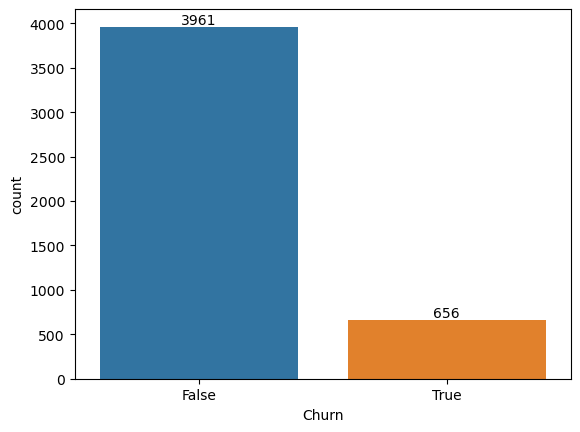

In [37]:
#plotting the churn column to analyse the values distribution in it-

ax = sns.countplot(x = 'Churn', data = vodafone)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

False- the customers who didn't opted out of our services.

True- the customers who opted out of our services.

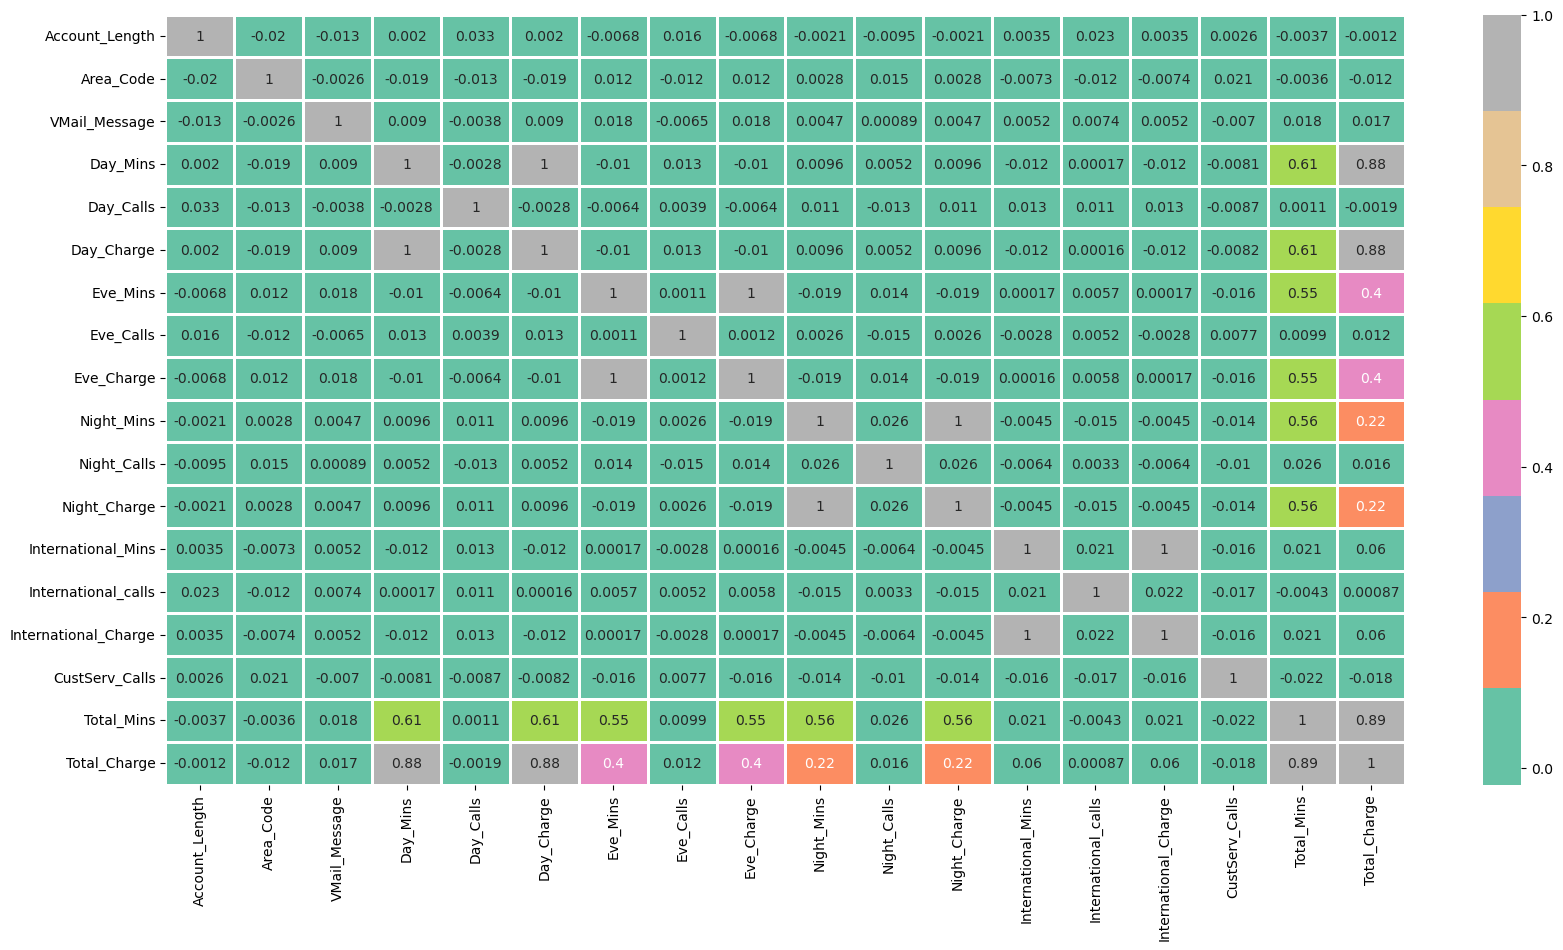

In [38]:
# plotting a heatmap to understand correlation between columns-

plt.figure(figsize = (20,10))
sns.heatmap(vodafone.corr(),cmap='Set2',linecolor='white',linewidths=1,annot=True)
plt.show()

Inference-

from the heatmap we can observe that a number of columns correlate with each other.

Account_Length, International_Plan, VMail_Plan, Day_Mins, Day_Charge, Eve_Mins, Eve_Charge, Night_Mins,Night_ChargeNight_Mins, Night_Charge, International_Mins, International_Charge, CustServ_Calls are correlated.

In [39]:
# Had to reindex the columns to get time spent and account length side by side
vodafone = vodafone.reindex(columns = ['State',
 'Account_Length',
 'Time_Spent',                                 
 'Area_Code',
 'International_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'International_Mins',
 'International_calls',
 'International_Charge',
 'CustServ_Calls',
 'Total_Mins',                                     
 'Total_Charge',                                      
 'Churn'])

In [40]:
vodafone.head()

,State,Account_Length,Time_Spent,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Total_Mins,Total_Charge,Churn
0,KS,128,120-150,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,717.2,75.56,False
1,OH,107,90-120,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,625.2,59.24,False
2,NJ,137,120-150,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,539.4,62.29,False
3,OH,84,60-90,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,564.8,66.80,False
4,OK,75,60-90,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,512.0,52.09,False


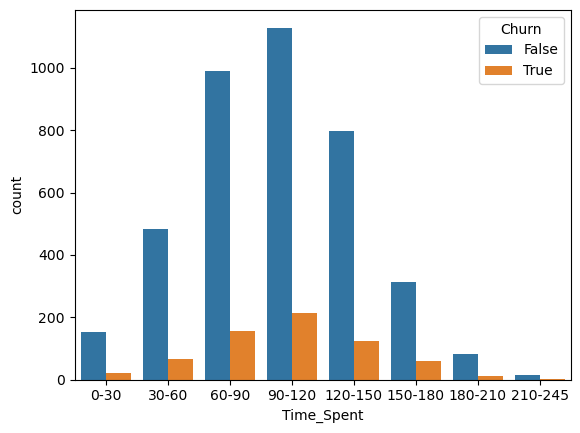

In [41]:
# plotting the graph-

sns.countplot(vodafone['Time_Spent'],hue= vodafone['Churn'])
plt.show()

Inference

The departure of clients who recently joined and had a brief engagement with our services highlights potential causes for their exit. One possible reason is that these customers did not have sufficient time to fully experience and appreciate the value our services can provide. Additionally, network problems might have played a role, as some clients may have sought better services from providers located closer to them. Furthermore, it is plausible that these clients were enticed away by competing businesses offering attractive offers or promotions. To address this situation, our company should conduct a thorough evaluation of our offerings, focusing on improving network reliability and enhancing the overall customer experience.

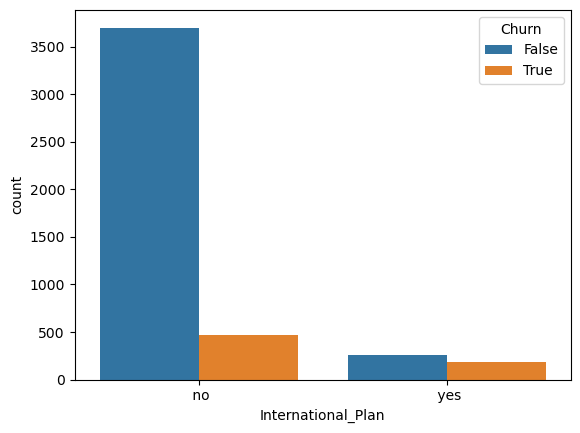

In [43]:
# plotting the graph-

sns.countplot(vodafone['International_Plan'],hue= vodafone['Churn'])
plt.show()

Inference 
 
The majority of customers who have left the business can be attributed to not choosing an international plan, and there are several underlying reasons for this. Firstly, many of these customers may not have had a need for international coverage due to infrequent or nonexistent international travel. Secondly, the additional cost associated with international plans might have deterred budget-conscious customers or those with limited usage requirements. Thirdly, the availability of alternative communication options, such as internet-based apps, may have provided more cost-effective or even free international communication, reducing the appeal of dedicated international plans.

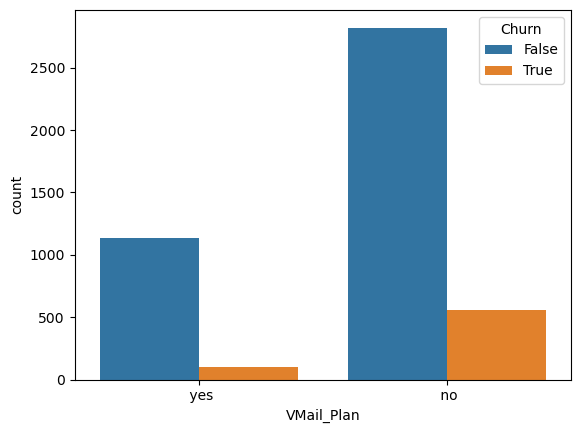

In [44]:
# plotting the graph-

sns.countplot(vodafone['VMail_Plan'],hue= vodafone['Churn'])
plt.show()

Inference

The majority of customers who have left the business, as well as the majority of loyal customers, did not choose a voice mail plan, and there are several reasons underlying this trend. One possible explanation is that customers have shifted towards alternative methods of communication, such as instant messaging, email, or direct phone calls, which they find more convenient and efficient. Additionally, the added cost of voice mail plans may deter budget-conscious customers or those with limited usage requirements who prioritize allocating their resources to other essential services. Technological advancements have also provided customers with a wider range of communication options, making voice mail seem outdated or less preferred. Some customers may value real-time communication and prioritize immediate responses, leading them to favor direct conversations over voice mail. Lastly, individual communication habits and preferences play a role, as some customers may have alternative systems in place or simply do not find voice mail necessary for their needs.

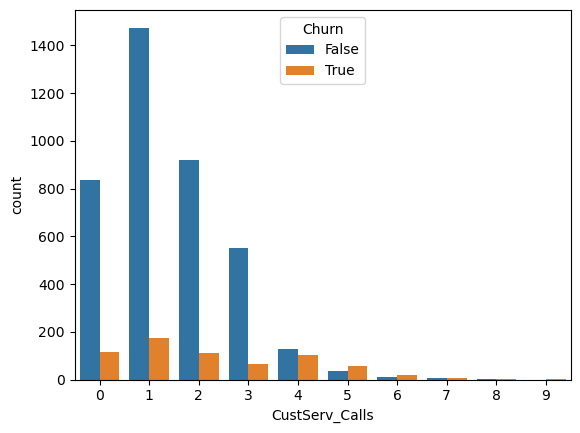

In [45]:
# plotting the graph-

sns.countplot(vodafone['CustServ_Calls'],hue= vodafone['Churn'])
plt.show()

Inference

The significant increase in customer service calls from customers who have left the business can be attributed to various reasons. Firstly, customers may have experienced service dissatisfaction, leading them to reach out multiple times in an attempt to resolve issues or express their discontent. Secondly, communication breakdowns may have occurred, as customers felt their concerns were not adequately addressed in previous interactions, prompting them to persistently contact customer service. Thirdly, recurring service disruptions or inconsistent product performance could have compelled customers to make repeated calls to address ongoing problems.

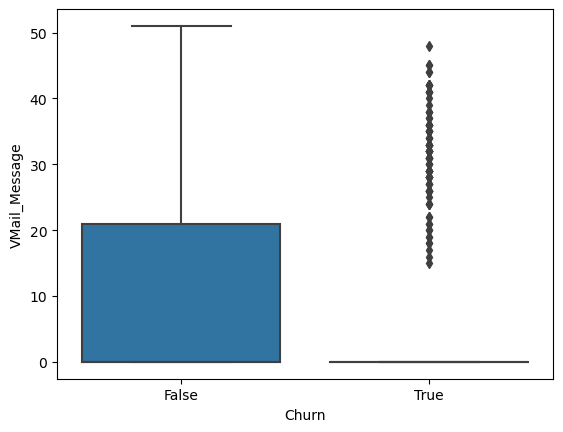

In [46]:
# plotting the graph-

sns.boxplot(vodafone['Churn'],vodafone['VMail_Message'])
plt.show()

Inference

The disparity between the majority of clients who discontinued our services not utilizing voice mail, compared to the majority of continuing customers who did, can be attributed to several factors. One possible explanation is that customers who stopped using our services had a preference for alternative communication methods such as direct phone calls, text messages, or instant messaging, finding them more convenient and suitable for their needs. These customers may have prioritized immediate response and real-time communication over the use of voice mail. On the other hand, the range of 0 to 20 voice mail messages among our continuing customers indicates varying levels of reliance on this feature. Those who utilized voice mail messages likely had a higher volume of missed calls or a specific need for storing and retrieving voice messages. For these customers, voice mail served as an important tool for receiving and managing business-related communications. Personal preference and communication habits also come into play, as some customers may have developed a preference for voice messages or incorporated voice mail as part of their regular communication routine. By understanding these factors, we can adapt our communication offerings to better cater to the preferences and needs of our clients.

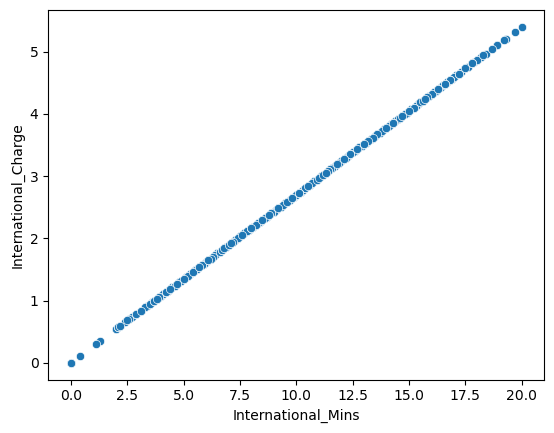

In [47]:
# plotting the graph-

sns.scatterplot( vodafone['International_Mins'],vodafone['International_Charge'])
plt.show()

Inference

As can be seen, as international minutes grow, the standard fee does too, without any anomalies.

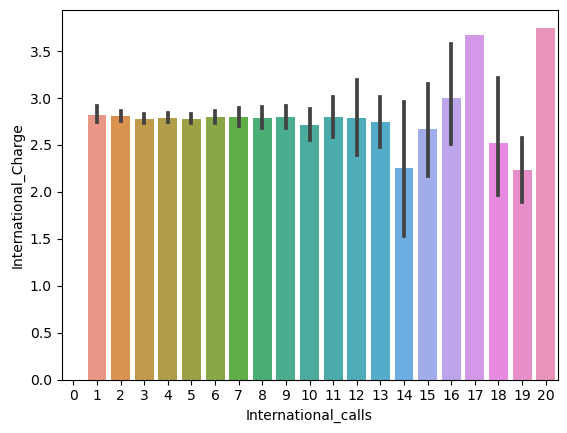

In [48]:
# plotting the graph-

sns.barplot(vodafone['International_calls'],vodafone['International_Charge'])
plt.show()

Inference

As can be shown, the quantity of calls made on an international plan has little bearing on international prices.

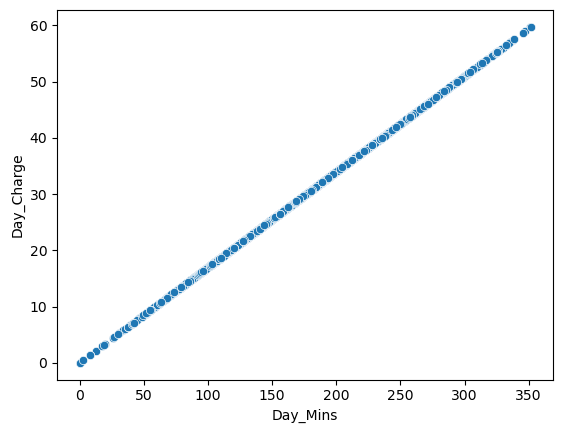

In [49]:
# plotting the graph-

sns.scatterplot(vodafone['Day_Mins'],vodafone['Day_Charge'])
plt.show()

Inference

we can observe as Day mins increases the standard charge also increase with no anomalies.

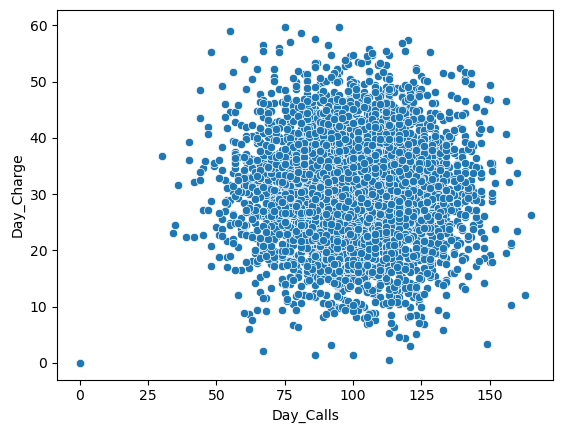

In [50]:
# plotting the graph-

sns.scatterplot(vodafone['Day_Calls'],vodafone['Day_Charge'])
plt.show()

Inference

As we can see, the number of calls made during the day has no bearing on the fees we charge our clients.

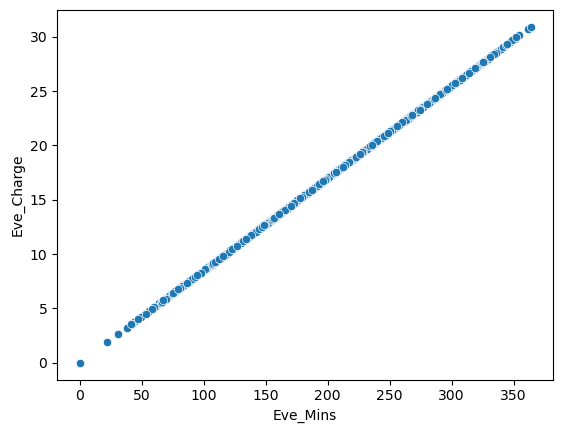

In [51]:
# plotting the graph-

sns.scatterplot(vodafone['Eve_Mins'],vodafone['Eve_Charge'])
plt.show()

Inference

we can observe as evening mins increases the standard charge also increase with no anomalies.

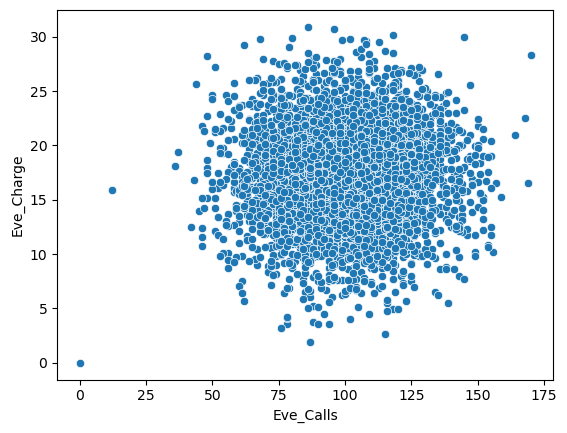

In [52]:
# plotting the graph-

sns.scatterplot(vodafone['Eve_Calls'],vodafone['Eve_Charge'])
plt.show()

Inference

As we can see, the number of calls made during evening has no bearing on the fees we charge our clients.

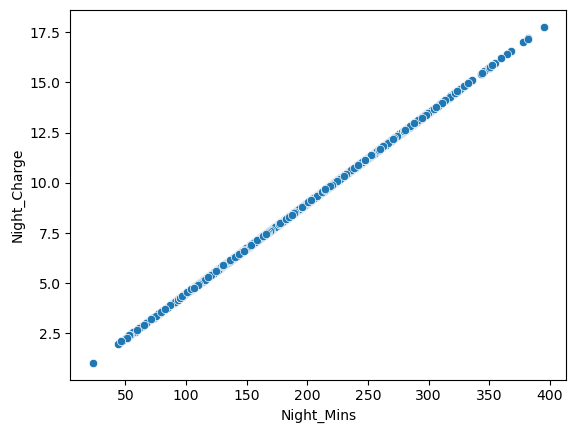

In [53]:
# plotting the graph-

sns.scatterplot(vodafone['Night_Mins'],vodafone['Night_Charge'])
plt.show()

Inference

we can observe as night mins increases the standard charge also increase with no anomalies.

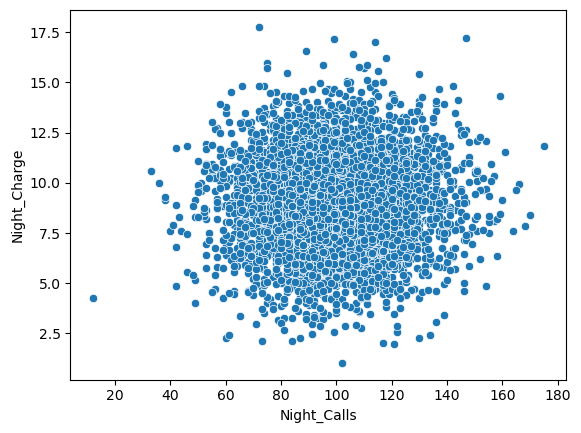

In [54]:
# plotting the graph-

sns.scatterplot(vodafone['Night_Calls'],vodafone['Night_Charge'])
plt.show()

Inference

As we can see, the number of calls made during night has no bearing on the fees we charge our clients.

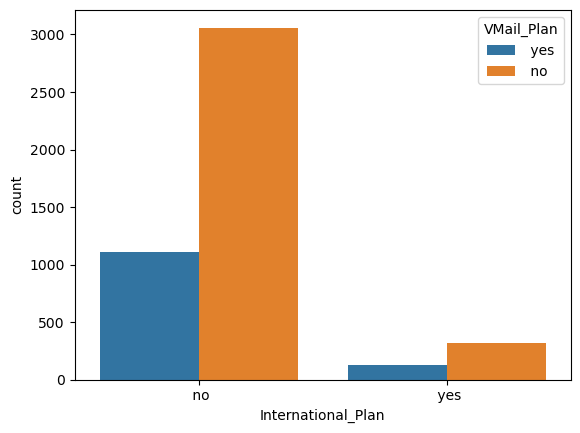

In [55]:
# plotting the graph-

sns.countplot(vodafone['International_Plan'],hue = vodafone['VMail_Plan'])
plt.show()

Inference 
 
The majority of customers who have stopped using our services did not have either an international plan or a voice mail plan. This can be attributed to factors such as limited communication needs, cost considerations, communication preferences, technological advancements, and individual usage patterns. Some customers may not have required international calling or data services, while others may have opted for alternative communication methods or found voice mail unnecessary. Cost-conscious customers may have chosen to forego additional plans, and advancements in technology have provided alternative communication options. Understanding these reasons helps us assess the demand for these services and tailor our offerings to better meet the diverse communication needs of our customers who have discontinued using our services.

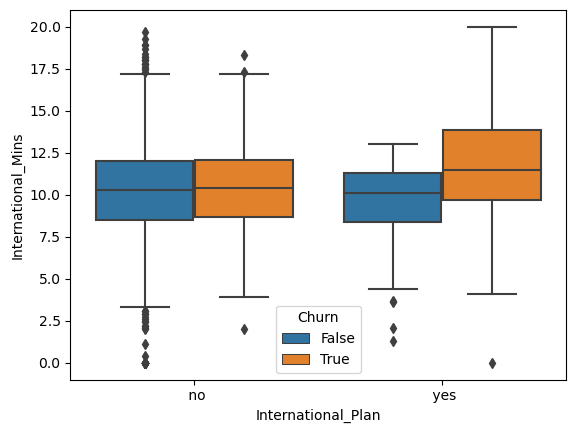

In [56]:
# plotting the graph-

sns.boxplot(x="International_Plan", y='International_Mins', hue="Churn",data=vodafone)
plt.show()

inference

Customers who had availed an international plan and exited our services talked for 8 to 11 minutes, which suggests several possible reasons. It could be due to unsatisfactory international call quality, the high cost associated with international calls, the availability of alternative communication options, a perceived lack of value or benefits in our services, or unresolved issues with our international calling service. By understanding these factors, we can work towards improving call quality, offering competitive pricing, addressing customer concerns promptly, and enhancing the overall value of our international calling services to better retain customers who rely on international communication.

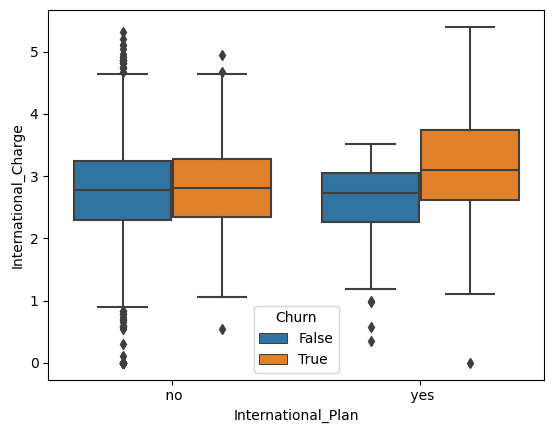

In [57]:
# plotting the graph-

sns.boxplot(x="International_Plan", y='International_Charge', hue="Churn",data=vodafone)
plt.show()

Inference

Customers who availed the international plan and were charged based on their usage were more likely to exit from our services. In contrast, customers who didn't avail the international plan were charged almost equally regardless of their usage. This discrepancy can be attributed to factors such as cost sensitivity, the availability of alternative communication options, perceived value, competitive pricing, and diverse communication needs. Customers who found the charges for international usage excessive or disproportionate may have chosen to leave, while those who discovered more cost-effective alternatives may have remained. Additionally, competitive pricing and meeting the specific communication needs of customers who didn't avail the international plan likely contributed to their continued loyalty. By understanding these factors, we can refine our pricing strategies, enhance the value of our international plans, and tailor our offerings to better meet the diverse needs of our customer base.

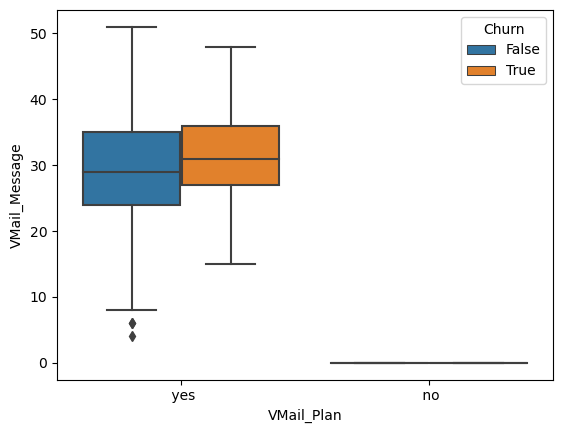

In [58]:
# plotting the graph-

sns.boxplot(x="VMail_Plan", y='VMail_Message',hue="Churn",data=vodafone)
plt.show()

Inference

Customers who have availed the Voice mail plan and actively use voice mail messages are less likely to exit from our services. This can be attributed to the convenience and value that voice mail offers in communication. Active usage indicates that customers find voice mail beneficial for receiving, storing, and retrieving important messages. It enhances the overall communication experience, allows for message management at the customer's convenience, and contributes to customer satisfaction and engagement. Personal preferences and habits also influence the usage of voice mail. By recognizing the significance of voice mail and continually improving its reliability and functionality, we can strengthen customer loyalty and retention.

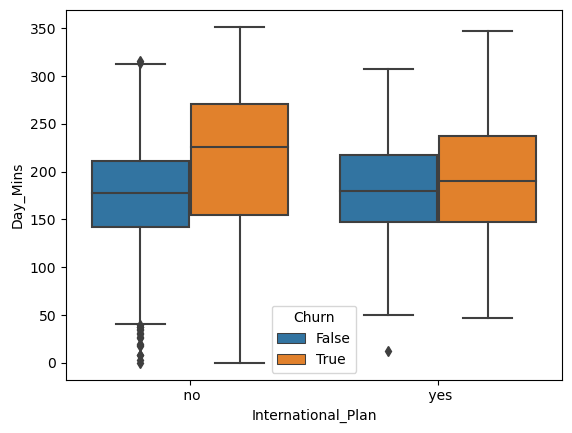

In [59]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Day_Mins'],hue = vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the international plan exhibited higher talk times during the day, ranging from 160 to 275 minutes, surpassing other customer groups. Similarly, customers who had the international plan and still exited talked for 150 to 240 minutes. Several factors could explain this pattern. Customers with higher talk times likely had increased communication needs, but if our services did not meet their requirements or if they found more cost-effective alternatives, they may have chosen to leave. Additionally, the availability of alternative providers offering better international calling rates or unmet expectations regarding call quality and coverage could have influenced customer decisions. By understanding these reasons, we can enhance our offerings, pricing strategies, and service quality to better meet customer needs and foster retention.

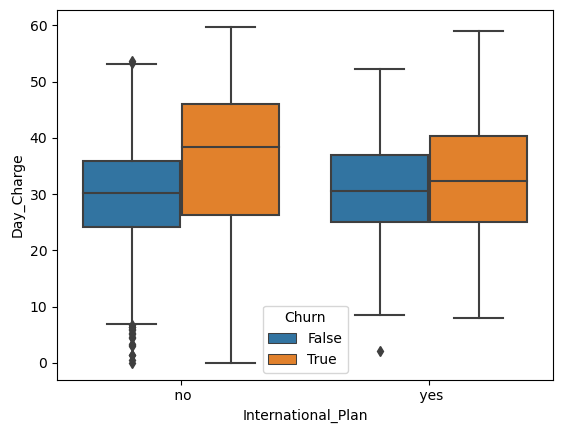

In [60]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Day_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services were found to be those who had not availed the international plan and were charged more during the day compared to other customer groups. Similarly, customers who availed the international plan and still exited were charged more in relation to their usage. Potential reasons for this include higher overall usage or specific usage patterns for customers without the international plan, which may have led to increased charges. Additionally, customers who availed the international plan and were charged more may have had different value perceptions, encountered competitive pricing from other providers, or experienced unmet expectations regarding quality and pricing. By understanding these factors, we can assess our pricing strategies, improve value perception, address service quality issues, and ensure competitive pricing to better retain customers.

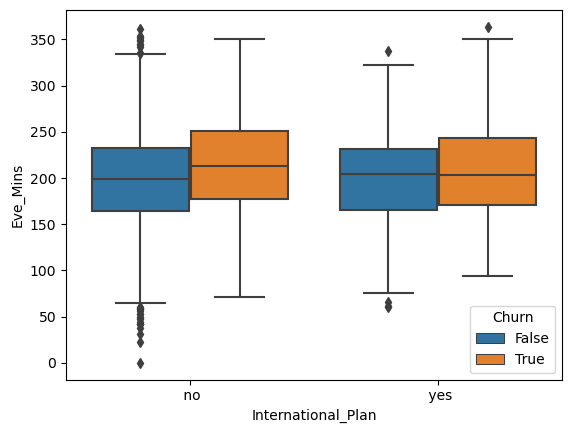

In [61]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Eve_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the international plan exhibited higher talk times during the evening, ranging from 180 to 250 minutes, surpassing other customer groups. Similarly, customers who had the international plan and still exited talked for 160 to 230 minutes. Potential reasons for this include higher communication needs among customers without the international plan, cost considerations influencing their plan choices, availability of alternative providers offering better international calling rates, and unmet expectations regarding call quality and pricing. By understanding these factors, we can enhance our offerings, pricing strategies, and service quality to better meet customer needs and foster retention.

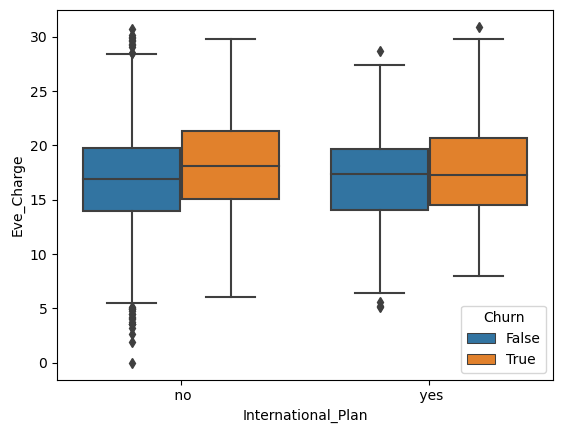

In [62]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Eve_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services were found to be those who had not availed the international plan and were charged more during the evening compared to other customer groups. Similarly, customers who availed the international plan and still exited were charged more in relation to their usage. Potential reasons for this include higher overall usage or specific usage patterns for customers without the international plan, which may have led to increased charges. Additionally, customers who availed the international plan and were charged more may have had different value perceptions, encountered competitive pricing from other providers, or experienced unmet expectations regarding quality and pricing. By understanding these factors, we can assess our pricing strategies, improve value perception, address service quality issues, and ensure competitive pricing to better retain customers.

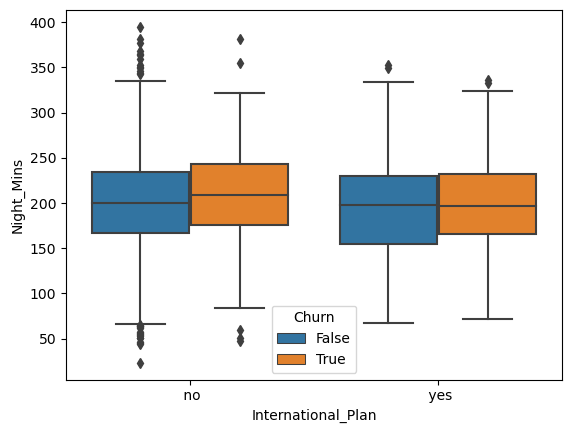

In [63]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Night_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the international plan had higher talk times during the night, ranging from 170 to 240 minutes, surpassing other customer groups. Similarly, customers who had the international plan and still exited talked for 160 to 220 minutes. Potential reasons for this include increased communication needs during the night among customers without the international plan, cost considerations influencing their plan choices, availability of alternative providers offering better international calling rates, and unmet expectations regarding call quality and pricing. By understanding these factors, we can enhance our offerings, pricing strategies, and service quality to better meet customer needs and foster retention.

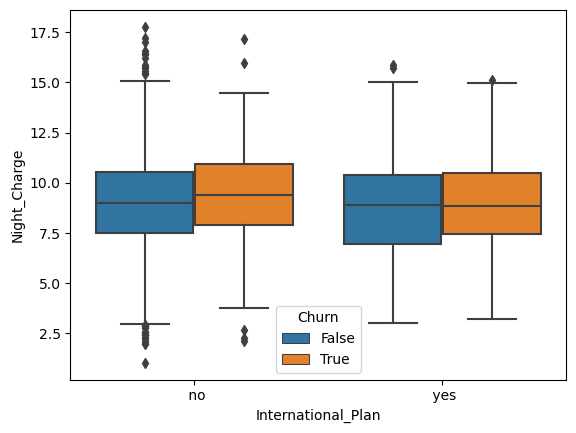

In [64]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Night_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the international plan were charged more during the night compared to other customer groups. Similarly, customers who availed the international plan and still exited were charged more in relation to their usage. Potential reasons for this include higher nighttime usage among customers without the international plan, value perception related to pricing and services, competitive pricing offered by other providers, and unmet expectations regarding quality and pricing during nighttime usage. Understanding these factors can help us evaluate our pricing strategies, improve value perception, address service quality issues, and stay competitive in the market to retain customers.

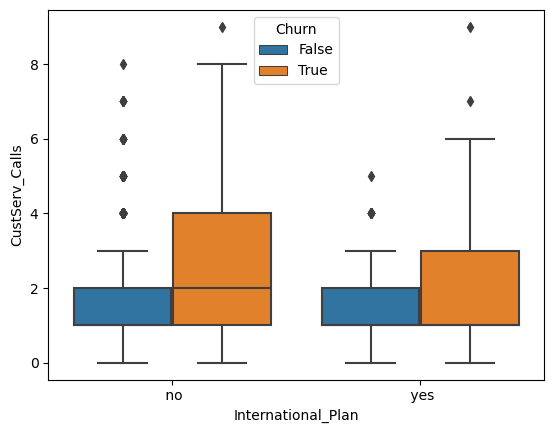

In [65]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['CustServ_Calls'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the international plan were found to have made the maximum number of customer service calls among all customer groups. Similarly, customers who had the international plan and still exited also had a higher number of customer service calls. On the other hand, customers who were satisfied with our services made a minimum number of customer service calls. Potential reasons for this include dissatisfaction with the quality of service or the need for frequent assistance among customers who made more service calls. Conversely, satisfied customers may have had fewer issues or concerns, resulting in a lower need for customer service interactions. Understanding these patterns can help us identify areas for improvement in service quality, address customer concerns proactively, and enhance overall customer satisfaction to reduce customer attrition.

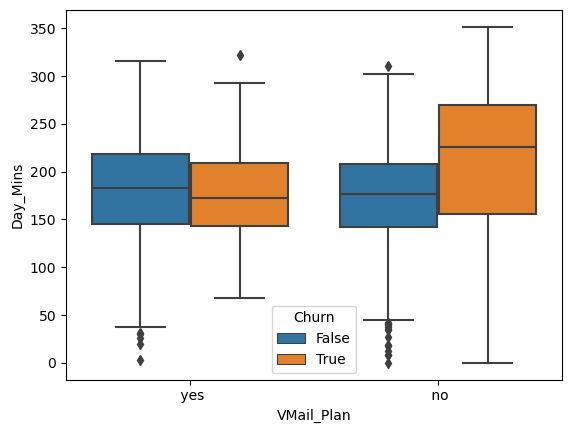

In [66]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Day_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan had higher talk times during the day, ranging from 160 to 275 minutes, surpassing other customer groups. Similarly, customers who had the voice mail plan and still exited talked for 140 to 210 minutes. Potential reasons for this include customers' higher communication needs and preference for direct conversation among those without the voice mail plan, perceived value and convenience issues associated with the voice mail plan among customers who had it, and the availability of alternative solutions for message storage and communication. Understanding these factors can help us evaluate and enhance the value proposition of our voice mail plan, address any limitations or challenges, and adapt our services to better meet the diverse communication preferences and needs of our customers.

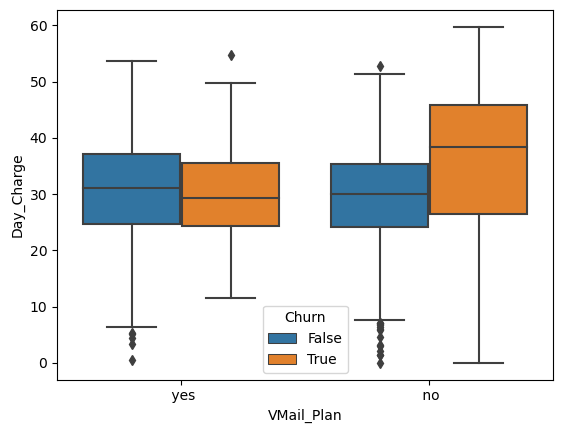

In [67]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Day_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan were charged more during the day compared to other customer groups, while customers who had the voice mail plan and still exited were charged based on their respective usage. Potential reasons for this include customers' preference for direct communication rather than relying on voice mail among those without the plan, value perception and convenience issues associated with the voice mail plan among customers who had it, and the presence of competitive pricing options for voice mail services. Understanding these factors allows us to evaluate the value proposition of our voice mail plan, address any limitations, and assess our pricing strategy to provide a seamless communication solution that meets customers' preferences and needs.

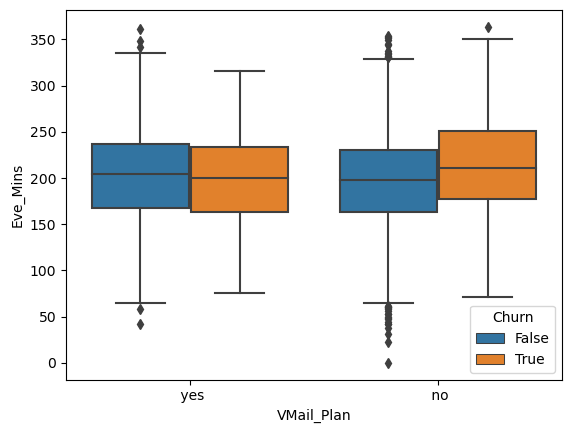

In [68]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Eve_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan spent 180 to 240 minutes talking during the evening, surpassing other customer groups. Similarly, customers who had the voice mail plan and still exited talked for 160 to 230 minutes. Potential reasons for this include their preference for direct conversation and real-time communication among those without the voice mail plan, perceived value and convenience issues associated with the voice mail plan among customers who had it, and the availability of alternative solutions for message storage and communication. Understanding these factors allows us to evaluate and enhance the value proposition of our voice mail plan, address any limitations or challenges, and adapt our services to better meet the diverse communication preferences and needs of our customers.

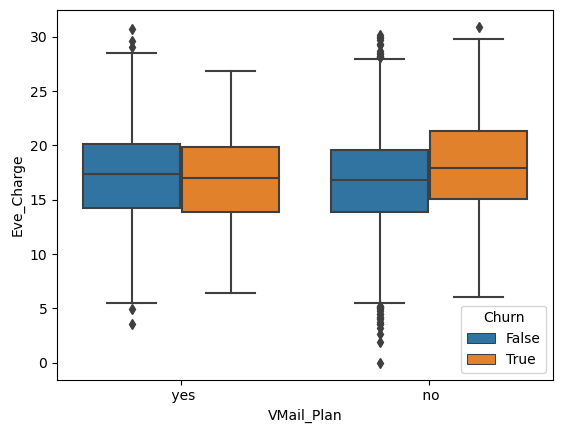

In [69]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Eve_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan were charged more during the evening compared to other customers, indicating their preference for direct communication rather than relying on voice mail. On the other hand, customers who had the voice mail plan and still exited were charged based on their usage. Potential reasons include customers' inclination towards real-time conversation and value perception associated with voice mail services. It is also possible that competitive pricing options influenced their decision. Understanding these factors allows us to assess the value proposition of our voice mail plan, address limitations, and improve our pricing strategy to provide a seamless communication solution that meets customers' preferences and needs during the evening.

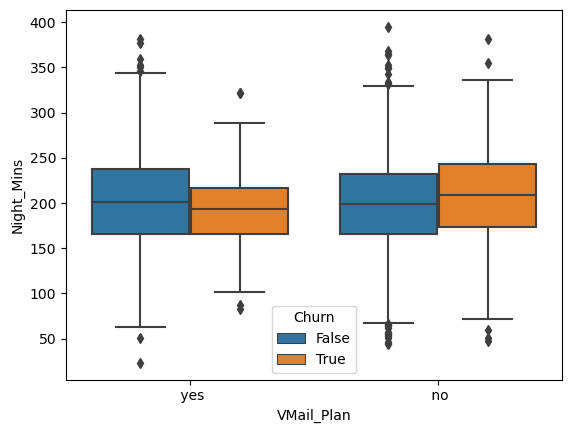

In [70]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Night_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan spent 170 to 240 minutes talking during the night, surpassing other customer groups. Similarly, customers who had the voice mail plan and still exited talked for 170 to 210 minutes. Potential reasons include their preference for direct conversation and real-time communication among those without the voice mail plan, perceived value and convenience issues associated with the voice mail plan among customers who had it, and the availability of alternative solutions for message storage and communication. Understanding these factors allows us to evaluate and enhance the value proposition of our voice mail plan, address any limitations or challenges, and adapt our services to better meet the diverse communication preferences and needs of our customers.

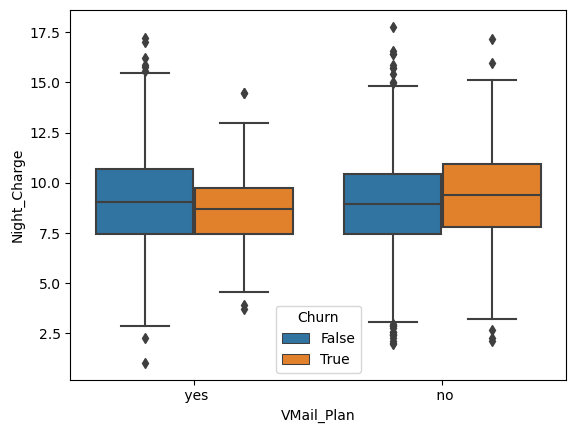

In [71]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Night_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services without availing the voice mail plan were charged more during the night compared to other customers, suggesting their preference for direct communication rather than relying on voice mail. On the other hand, customers who had the voice mail plan and still exited were charged based on their respective usage. Potential reasons include customers' inclination towards real-time conversation and value perception associated with voice mail services. It is also possible that competitive pricing options influenced their decision. Understanding these factors allows us to assess the value proposition of our voice mail plan, address limitations, and improve our pricing strategy to provide a seamless communication solution that meets customers' preferences and needs during the night.

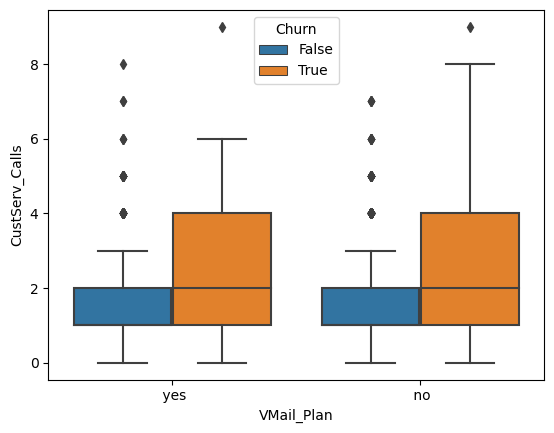

In [72]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['CustServ_Calls'],hue =vodafone['Churn'])
plt.show()

Inference 

Customers who exited our services, whether they had availed the voice mail plan or not, made the maximum number of customer service calls, as depicted in the figure. This could be attributed to various factors, including dissatisfaction with the voice mail service among those who had it, a preference for direct communication rather than relying on voice mail, and higher support needs among the customers who made numerous calls. Understanding these factors allows us to evaluate the performance of our voice mail system, address any issues, and improve the overall customer experience to minimize churn.

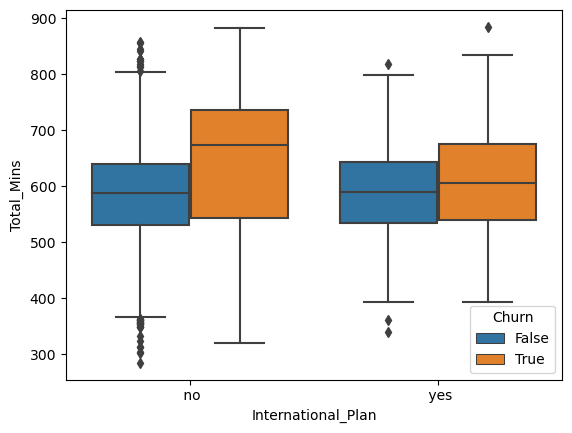

In [73]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Total_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services exhibited a higher talk time compared to other customers, as depicted in the figure. Those who did not avail the international plan spent 550 to 740 minutes talking per 24 hours, while those with the international plan spent 530 to 670 minutes. The higher talk time could be attributed to their communication needs, call quality and availability, and perceived value of extended conversations. Understanding these factors helps us evaluate the international plan's attractiveness, improve call quality, and meet the communication preferences of these customer segments.

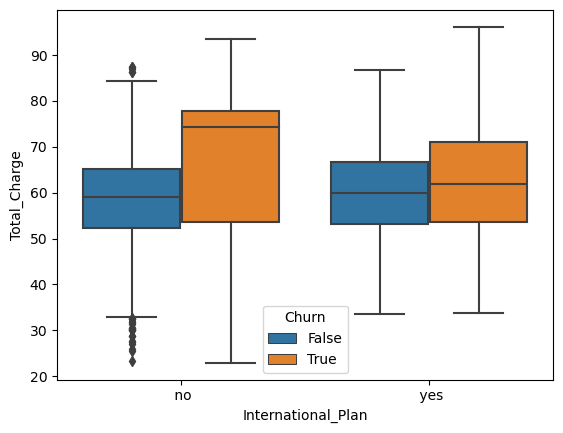

In [74]:
# plotting the graph-

sns.boxplot(vodafone['International_Plan'],vodafone['Total_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Based on the figure, customers who exited our services were those who did not avail the international plan and were charged more in relation to their usage per 24 hours. Similarly, customers who exited but had availed the international plan were also charged more respective to their usage. The higher charges could be attributed to factors such as cost-effectiveness, usage patterns, and international communication needs. Understanding these factors allows us to evaluate our pricing strategies, assess the competitiveness of our international plan, and provide more cost-effective solutions to meet the specific communication needs of our customers.

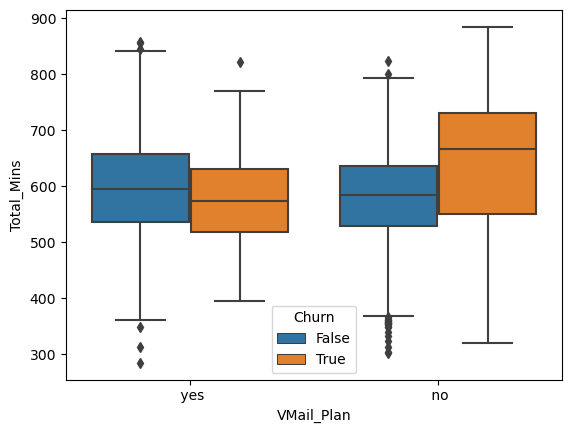

In [75]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Total_Mins'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services had not availed the voice mail plan and spent 560 to 720 minutes talking per 24 hours, while those who exited but had availed the plan spent 520 to 630 minutes talking. This discrepancy in talk time can be attributed to factors such as communication needs, accessibility, and convenience. Customers without the voice mail plan likely had higher communication needs, preferring live conversations over voice messages. They sought immediate and direct interactions, leading to longer talk times. Understanding these factors helps us tailor our services to meet different customer preferences, promoting the benefits of the voice mail plan and providing efficient communication channels.

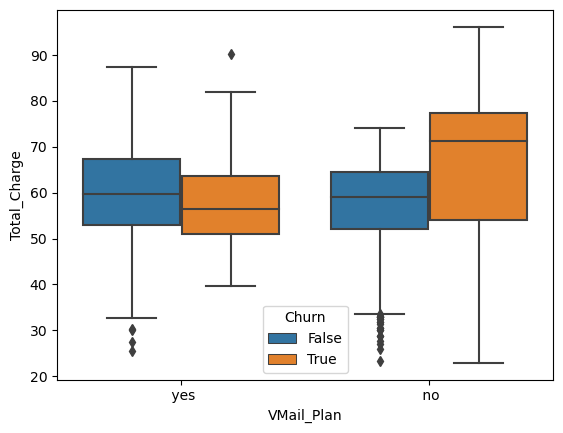

In [76]:
# plotting the graph-

sns.boxplot(vodafone['VMail_Plan'],vodafone['Total_Charge'],hue =vodafone['Churn'])
plt.show()

Inference

Customers who exited our services were those who did not avail the voice mail plan and were charged more respective to their usage per 24 hours. Similarly, customers who exited but had availed the voice mail plan were also charged respective to their usage. This suggests that communication preferences and usage patterns played a role in customer attrition. Those without the voice mail plan likely preferred direct conversations, resulting in higher usage and charges. Additionally, cost considerations may have influenced their decision to rely solely on voice calls. Understanding these factors can guide us in optimizing our service offerings and pricing plans to better meet customer needs and reduce attrition.

In [77]:
vodafone.head()

,State,Account_Length,Time_Spent,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Total_Mins,Total_Charge,Churn
0,KS,128,120-150,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,717.2,75.56,False
1,OH,107,90-120,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,625.2,59.24,False
2,NJ,137,120-150,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,539.4,62.29,False
3,OH,84,60-90,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,564.8,66.80,False
4,OK,75,60-90,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,512.0,52.09,False


In [78]:
vodafone.drop(vodafone.columns[[8,11,14,17]],axis=1,inplace=True)

#dropped columns = ('International_calls','Day_Calls','Eve_Calls','Night_Calls')

Inference-

we observed that number of  calls made during day, evening, night or on international have no impact on thier respective charges, so we are going to drop them from the dataset, so it doesn't make it difficult for machine learning models to produce accurate results.These columns have no affect on churn so we will drop these columns.

# Conclusion

In conclusion, the analysis reveals several key insights for improving customer retention and satisfaction. Firstly, customers who have been with the company for more than 120 months exhibit higher loyalty and are less likely to leave. This indicates the importance of nurturing long-term relationships with customers.

Secondly, customers who did not avail the international plan or voice mail plan made the maximum number of customer service calls. This suggests that their queries may not have been adequately resolved, leading them to seek services from other companies. Enhancing the quality of customer service calls and ensuring prompt issue resolution should be a priority to address this concern.

Furthermore, special attention should be given to recently acquired customers to prevent them from exiting our services. Implementing targeted strategies, such as personalized onboarding experiences and proactive communication, can help build a strong foundation for their loyalty and satisfaction.

To improve customer service, it is recommended to increase staffing levels in the customer service department. This will ensure adequate support and faster response times, leading to better customer experiences. Additionally, conducting surveys and obtaining customer ratings after resolving their complaints can provide valuable feedback for continuous improvement.

In conclusion, by focusing on fostering long-term relationships, addressing customer queries effectively, targeting newly acquired customers, and investing in customer service quality, the company can enhance customer loyalty, reduce churn, and improve overall customer satisfaction.

In [80]:
# creating a new column named churn flag
vodafone['Churn_Flag'] = vodafone['Churn']

In [81]:
# top 5 rows of data
vodafone.head()

,State,Account_Length,Time_Spent,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,International_Mins,International_Charge,CustServ_Calls,Total_Mins,Total_Charge,Churn,Churn_Flag
0,KS,128,120-150,415,no,yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,717.2,75.56,False,False
1,OH,107,90-120,415,no,yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,625.2,59.24,False,False
2,NJ,137,120-150,415,no,no,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,539.4,62.29,False,False
3,OH,84,60-90,408,yes,no,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,564.8,66.80,False,False
4,OK,75,60-90,415,yes,no,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,512.0,52.09,False,False


In [82]:
# replacing false with 0 and true with 1
vodafone['Churn_Flag'] = vodafone['Churn_Flag'].replace('False',0,regex=True)
vodafone['Churn_Flag'] = vodafone['Churn_Flag'].replace('True',1,regex=True)

In [83]:
vodafone

,State,Account_Length,Time_Spent,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,International_Mins,International_Charge,CustServ_Calls,Total_Mins,Total_Charge,Churn,Churn_Flag
0,KS,128,120-150,415,no,yes,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,717.2,75.56,False,0
1,OH,107,90-120,415,no,yes,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,625.2,59.24,False,0
2,NJ,137,120-150,415,no,no,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,539.4,62.29,False,0
3,OH,84,60-90,408,yes,no,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,564.8,66.80,False,0
4,OK,75,60-90,415,yes,no,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,512.0,52.09,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,30-60,510,no,yes,25,144.0,24.48,187.2,15.91,158.6,7.14,8.5,2.30,3,498.3,49.83,False,0
4613,NM,177,150-180,408,no,yes,29,189.0,32.13,303.1,25.76,163.6,7.36,15.7,4.24,3,671.4,69.49,False,0
4614,VT,67,60-90,408,no,yes,33,127.5,21.68,296.1,25.17,200.9,9.04,13.0,3.51,1,637.5,59.40,False,0
4615,MI,98,90-120,415,no,yes,23,168.9,28.71,226.3,19.24,165.5,7.45,14.3,3.86,0,575.0,59.26,False,0


In [84]:
# how many times values have been repeated
vodafone['Churn_Flag'].value_counts()

0    3961
1     656
Name: Churn_Flag, dtype: int64

In [85]:
# taking y as predeciting column
y = vodafone.Churn_Flag
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn_Flag, dtype: int64

In [86]:
#importing label encoder from sklearn to encode the columns which have more than less than 5 categories 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
vodafone['International_Plan'] =enc.fit_transform(vodafone['International_Plan'])
vodafone['VMail_Plan'] =enc.fit_transform(vodafone['VMail_Plan'])

In [87]:
# taking our x as our factor columns and dropping columns which are not neccesary
x = vodafone.iloc[:,1:-4]
x.drop('Area_Code',inplace=True,axis=1)
x.drop('Time_Spent',inplace=True,axis=1)
x.drop('VMail_Message',inplace=True,axis=1)
x

,Account_Length,International_Plan,VMail_Plan,Day_Mins,Day_Charge,Eve_Mins,Eve_Charge,Night_Mins,Night_Charge,International_Mins,International_Charge,CustServ_Calls
0,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1
1,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1
2,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0
3,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2
4,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,0,1,144.0,24.48,187.2,15.91,158.6,7.14,8.5,2.30,3
4613,177,0,1,189.0,32.13,303.1,25.76,163.6,7.36,15.7,4.24,3
4614,67,0,1,127.5,21.68,296.1,25.17,200.9,9.04,13.0,3.51,1
4615,98,0,1,168.9,28.71,226.3,19.24,165.5,7.45,14.3,3.86,0


In [88]:
# importing train test split model from sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#  Logistic Regression

In [92]:
# importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

model_1 = LogisticRegression()

model_1.fit(x_train,y_train) 

predict_1 = model_1.predict(x_test)

ml = accuracy_score(y_test,predict_1)*100

print('Logistic Regression model accuracy  :' , ml)

Logistic Regression model accuracy  : 84.4155844155844


In [93]:
ps = precision_score(y_test,predict_1)

print('precision score of model : ',ps)

precision score of model :  0.3582089552238806


In [94]:
confusion_matrix(y_test,predict_1)

array([[756,  43],
       [101,  24]], dtype=int64)

# KNeighbors Classifier

In [95]:
# importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

model_2 = KNeighborsClassifier()

model_2.fit(x_train,y_train)

predict_2 = model_2.predict(x_test)

ml_2 = accuracy_score(y_test,predict_2)*100

print('KNeighbors Classifier model accuracy  :' , ml_2)

KNeighbors Classifier model accuracy  : 87.87878787878788


In [96]:
ps_1 = precision_score(y_test,predict_2)

print('precision score of model : ',ps_1)

precision score of model :  0.6274509803921569


In [97]:
confusion_matrix(y_test,predict_2)

array([[780,  19],
       [ 93,  32]], dtype=int64)

# DecisionTree Classifier

In [98]:
# importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()

model_3.fit(x_train,y_train)

predict_3 = model_3.predict(x_test)

ml_3 = accuracy_score(y_test,predict_3)*100

print('DecisionTree Classifier model accuracy :' , ml_3)

DecisionTree Classifier model accuracy : 88.74458874458875


In [99]:
ps_2 = precision_score(y_test,predict_3)

print('precision score of model : ',ps_2)

precision score of model :  0.5695364238410596


In [100]:
confusion_matrix(y_test,predict_3)

array([[734,  65],
       [ 39,  86]], dtype=int64)

# RandomForest Classifier

In [101]:
# importing RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier()

model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

ml_4 = accuracy_score(y_test,predict_4)*100

print('RandomForest Classifier model accuracy  :' , ml_4)

RandomForest Classifier model accuracy  : 94.37229437229438


In [102]:
ps_3 = precision_score(y_test,predict_4)

print('precision score of model : ',ps_3)

precision score of model :  0.9101123595505618


In [103]:
confusion_matrix(y_test,predict_4)

array([[791,   8],
       [ 44,  81]], dtype=int64)

# Support Vector Classifier

In [104]:
# importing Support Vector Classifier from sklearn
from sklearn.svm import SVC

model_5 = SVC()

model_5.fit(x_train,y_train)

predict_5 = model_5.predict(x_test)

ml_5 = accuracy_score(y_test,predict_5)*100

print('Support Vector Classifier model accuracy :' , ml_5)

Support Vector Classifier model accuracy : 86.7965367965368


In [105]:
ps_4 = precision_score(y_test,predict_5)

print('precision score of model : ',ps_4)

precision score of model :  1.0


In [106]:
confusion_matrix(y_test,predict_5)

array([[799,   0],
       [122,   3]], dtype=int64)

a precision score closer to 1.0 generally indicates better performance of a classification model, as it means the model is making fewer false positive predictions

so precision score SVC is 1.0

we consider SVC as best fit model